In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tmp = pickle.load(open("0306-currency adjusted rebalance record.out", "rb"))
nominal_price_result = tmp[0]
actual_price_result = tmp[1]

In [3]:
price_df_list = pickle.load(open("0306-adjusted market prices.out", "rb"))

In [4]:
nominal_plot_data_list = []
actual_plot_data_list = []

# for balance_freq in range(4):
for balance_freq in [1]: # We only draw the 6-month rebalancing
    # 1. Get Nominal Price Transaction Records
    nominal = nominal_price_result[balance_freq]
    trans_date_df = pd.DataFrame([tmp['Date']for tmp in nominal], columns = ['Date']) 
    # ^ Action dates in the five years
    nominal_trans_df_list = []
    
    for i in range(3): # nominal_df_list[0-2] for three assets
        asset_df = pd.DataFrame([tmp['Record'][i] for tmp in nominal]) 
        # ^ Get the asset weightage at each time
        result_df = pd.concat([trans_date_df, asset_df], axis=1)
        result_df.rename(columns={'0':'Date'}, inplace=True)
        nominal_trans_df_list.append(result_df)
        
    # 2. Get Actual Price Transaction Records
    actual = actual_price_result[balance_freq]
    trans_date_df = pd.DataFrame([tmp['Date']for tmp in actual], columns = ['Date'])
    actual_trans_df_list = []
    
    for i in range(3):
        asset_df = pd.DataFrame([tmp['Record'][i] for tmp in actual])
        result_df = pd.concat([trans_date_df, asset_df], axis=1)
        result_df.rename(columns={'0':'Date'}, inplace=True)
        actual_trans_df_list.append(result_df)

        
    for market_num in range(3):
        tmp_trans_df = actual_trans_df_list[market_num]
        trans_date = tmp_trans_df['Date']
        start_date = list(trans_date)[0]
        end_date = list(price_df_list[0]['Date'])[-1]

        history_df = price_df_list[market_num]
        all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
        plot_data = []
        number = 0
        net_value = 0
        price = 0
        for date in all_price_date:
            if (trans_date == date).any(): # If rebalanced at that day:
                number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
                net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
                price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
            else:
                price = history_df['Actual Price'][history_df['Date']==date].values[0]
                net_value = number*price
            plot_data.append({
                "Date": date,
                "Number": number,
                "Price": price,
                "Net Value": net_value
            })
        actual_plot_data_list.append(plot_data)
        
        
    for market_num in range(3):
        tmp_trans_df = nominal_trans_df_list[market_num]
        trans_date = tmp_trans_df['Date']
        start_date = list(trans_date)[0]
        end_date = list(price_df_list[0]['Date'])[-1]

        history_df = price_df_list[market_num]
        all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
        plot_data = []
        number = 0
        net_value = 0
        price = 0
        for date in all_price_date:
            if (trans_date == date).any(): # If rebalanced at that day:
                number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
                net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
                price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
            else:
                price = history_df['Actual Price'][history_df['Date']==date].values[0]
                net_value = number*price
            plot_data.append({
                "Date": date,
                "Number": number,
                "Price": price,
                "Net Value": net_value
            })
        nominal_plot_data_list.append(plot_data)

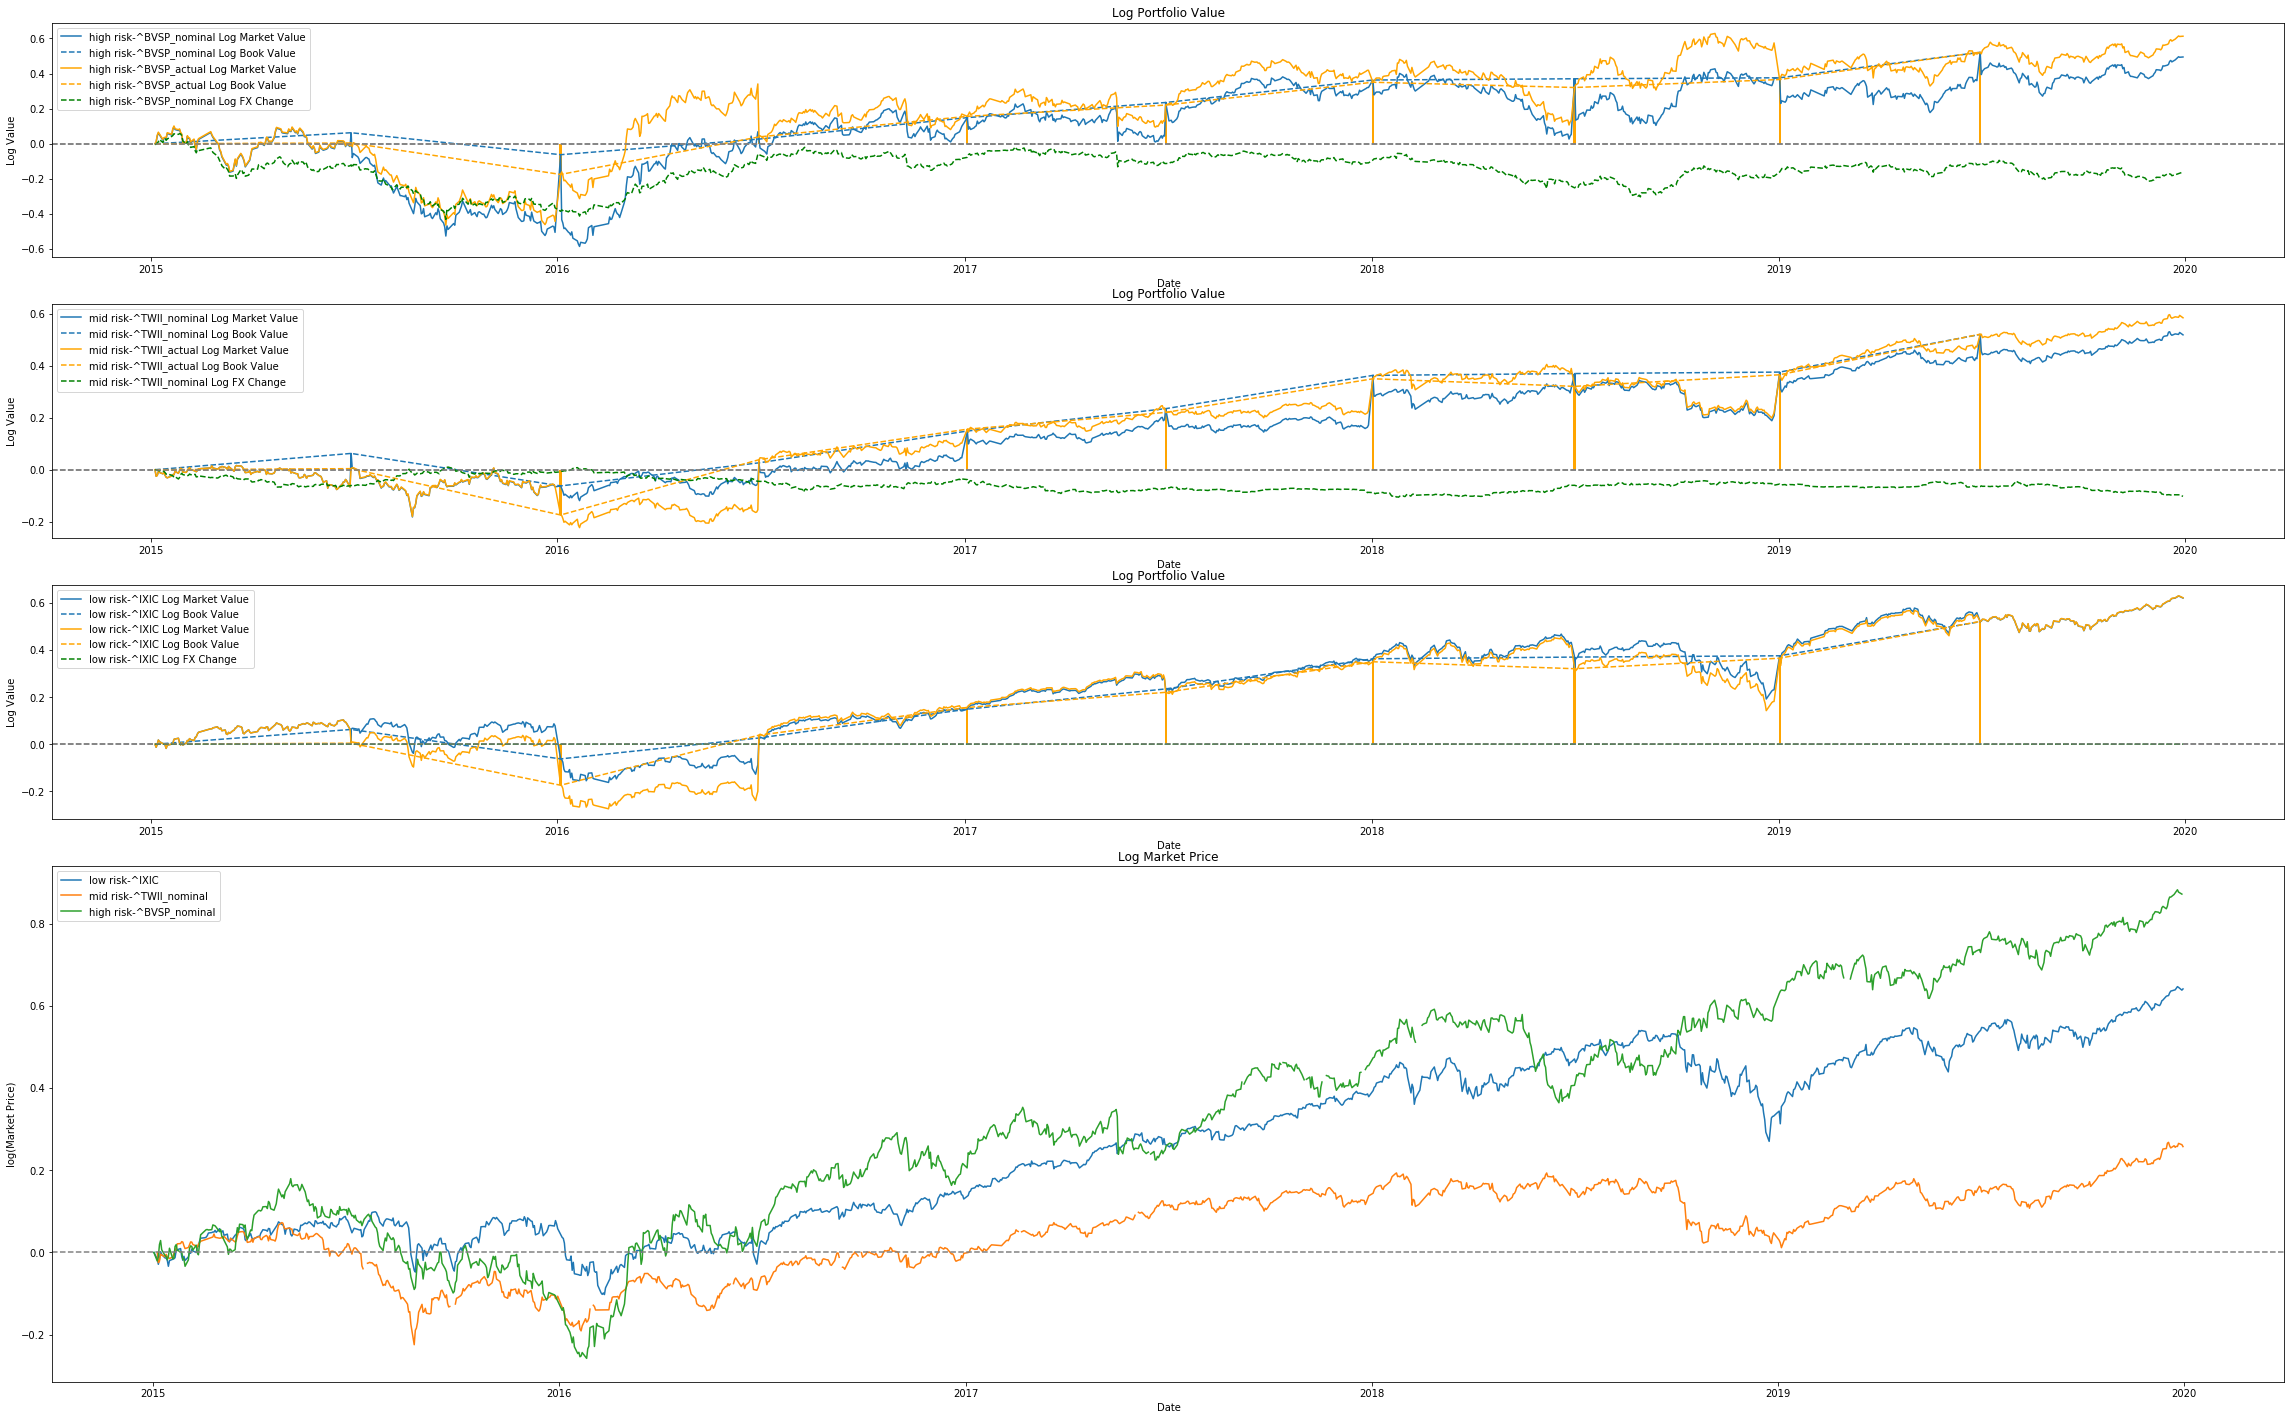

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from CSVUtils import *

DIR = "./from github/Stock-Trading-Environment/data"
file_names = ["^BVSP", "^TWII", "^IXIC"]
source_list = ["yahoo", "yahoo", "yahoo"]

nominal_labels = ["high risk-^BVSP_nominal", "mid risk-^TWII_nominal", "low risk-^IXIC"]
actual_labels = ["high risk-^BVSP_actual", "mid risk-^TWII_actual", "low rick-^IXIC"]


plt.rcParams['figure.facecolor'] = 'white'
fig=plt.figure(figsize=(40,25))
axs = []
gs=GridSpec(5,1) # 5 rows, 1 columns
axs.append(fig.add_subplot(gs[0,0])) # First row, first column
axs.append(fig.add_subplot(gs[1,0])) # First row, second column
axs.append(fig.add_subplot(gs[2,0])) # First row, third column
axs.append(fig.add_subplot(gs[3:,:])) # Second row, span all columns



for i, plot_data in enumerate(nominal_plot_data_list):
    plot_data = pd.DataFrame(plot_data)
    
    axs[i].plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]), 
                color="C0", label = nominal_labels[i]+" Log Market Value")
    axs[i].bar(nominal_trans_df_list[i]['Date'], np.log(nominal_trans_df_list[i]['Net Value']/nominal_trans_df_list[i]['Net Value'][0]), 
               width=2, color="C0")
    axs[i].plot(nominal_trans_df_list[i]['Date'], np.log(nominal_trans_df_list[i]['Net Value']/nominal_trans_df_list[i]['Net Value'][0]), 
                linestyle='--', color="C0", label = nominal_labels[i]+" Log Book Value")

    axs[i].axhline(y=0, color = "grey", linestyle='--')
    axs[i].legend()
    axs[i].set_title('Portfolio Weights')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Value (US$)')
    
    
for i, plot_data in enumerate(actual_plot_data_list):
    plot_data = pd.DataFrame(plot_data)
    
    axs[i].plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]), 
                color="orange", label = actual_labels[i]+" Log Market Value")
    axs[i].bar(actual_trans_df_list[i]['Date'], np.log(actual_trans_df_list[i]['Net Value']/actual_trans_df_list[i]['Net Value'][0]), 
               width=2, color="orange")
    
    axs[i].plot(actual_trans_df_list[i]['Date'], np.log(actual_trans_df_list[i]['Net Value']/actual_trans_df_list[i]['Net Value'][0]), 
                linestyle='--', color="orange", label = actual_labels[i]+" Log Book Value")
    axs[i].plot(price_df_list[i]['Date'], np.log(price_df_list[i]['Cum FX Change']),
                color="green",linestyle='--',label = nominal_labels[i]+" Log FX Change")
    
    
    axs[i].axhline(y=0, color = "grey", linestyle='--')
#     axs[i].set_ylim((0, 300000))
    axs[i].legend()
    axs[i].set_title('Log Portfolio Value')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Log Value')
    
    
    
for i in range(2,-1,-1): # Inverse: Low-Mid-High
    df = csv2df(DIR, file_names[i]+".csv",source = source_list[i])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date']>=pd.to_datetime("2015-01-01"))&(df['Date']<=pd.to_datetime("2019-12-31"))].reset_index(drop=True)

    j = 0
    init_price = df['Price'][j]
    while np.isnan(init_price):
        j+=1
        init_price = df['Price'][j]
    y = np.log(df['Price'][j:] / init_price)
    x = df['Date'][j:]
    axs[3].plot(x,y,label = nominal_labels[i])

axs[3].axhline(y=0, color = "grey", linestyle='--')
# axs[3].set_ylim((-1,1))
axs[3].legend()
axs[3].set_title('Log Market Price')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('log(Market Price)')
plt.show()